<a href="https://colab.research.google.com/github/daanishrasheed/Unit2_Build_Project/blob/master/BuildWeekUnit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---


# Model Interpretation 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make a Shapley force plot to explain at least 1 individual prediction.
- [ ] Share at least 1 visualization (of any type) on Slack.

But, if you aren't ready to make a Shapley force plot with your own dataset today, that's okay. You can practice this objective with another dataset instead. You may choose any dataset you've worked with previously.

## Stretch Goals
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!


## Links
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pbp-2018.csv to pbp-2018.csv


In [ ]:
import pandas as pd
play = pd.read_csv('pbp-2018.csv', engine='python')
print(play.shape)
play.head()

(45016, 45)


,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2018123015,2018-12-30,4,0,3,SEA,ARI,2,13,85,NaN,0,NaN,0,(:03) 11-S.JANIKOWSKI 33 YARD FIELD GOAL IS GO...,0,NaN,NaN,2018,0,FIELD GOAL,FIELD GOAL,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,15,OPP,0,NaN,0,NaN,0
1,2018123015,2018-12-30,4,0,8,SEA,ARI,1,10,88,NaN,0,NaN,0,(:08) 3-R.WILSON KNEELS TO ARI 15 FOR -3 YARDS.,0,NaN,NaN,2018,0,UNDER CENTER,QB KNEEL,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,12,OPP,0,NaN,0,NaN,0
2,2018123015,2018-12-30,4,0,16,SEA,ARI,2,8,77,NaN,1,NaN,0,(:16) 53-J.HUNT REPORTED IN AS ELIGIBLE. 32-C...,0,NaN,NaN,2018,11,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,RIGHT END,23,OPP,0,NaN,0,NaN,0
3,2018123015,2018-12-30,4,1,54,ARI,SEA,4,12,63,NaN,0,NaN,0,(1:54) 5-Z.GONZALEZ 55 YARD FIELD GOAL IS GOOD...,0,NaN,NaN,2018,0,FIELD GOAL,FIELD GOAL,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,37,OPP,0,NaN,0,NaN,0
4,2018123015,2018-12-30,4,2,0,ARI,SEA,3,12,63,NaN,0,NaN,0,(2:00) (SHOTGUN) 3-J.ROSEN PASS INCOMPLETE DEE...,0,NaN,NaN,2018,0,SHOTGUN,PASS,0,1,1,0,DEEP MIDDLE,0,0,0,NaN,0,0,0,0,0,0,NaN,37,OPP,0,NaN,0,NaN,0


In [ ]:
play = play.drop(play[play.Down == 0].index)

In [ ]:
play.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
15,2018090903,2018-09-09,4,0,10,MIA,TEN,1,10,52,NaN,0,NaN,0,(:10) 17-R.TANNEHILL KNEELS TO TEN 49 FOR -1 Y...,0,NaN,NaN,2018,0,UNDER CENTER,QB KNEEL,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,48,OPP,0,NaN,0,NaN,0
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,28,NaN,1,NaN,0,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,0,NaN,NaN,2018,8,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,RIGHT END,28,OWN,0,NaN,0,NaN,0
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,52,NaN,0,NaN,0,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,0,NaN,NaN,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,CENTER,48,OPP,0,NaN,0,NaN,0
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,25,NaN,0,NaN,0,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,0,NaN,NaN,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,NaN,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,38,NaN,1,NaN,0,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",0,NaN,NaN,2018,13,NO HUDDLE SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,0,0,0,0,0,NaN,38,OWN,0,NaN,0,NaN,0


In [ ]:
df = play.drop(columns=['Unnamed: 10', 'Unnamed: 12', 'Unnamed: 16', 'Unnamed: 17', 'Challenger'])

In [ ]:
df.tail(5)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
45011,2018123015,2018-12-30,4,2,0,ARI,SEA,3,12,63,0,0,(2:00) (SHOTGUN) 3-J.ROSEN PASS INCOMPLETE DEE...,0,2018,0,SHOTGUN,PASS,0,1,1,0,DEEP MIDDLE,0,0,0,0,0,0,0,0,0,NaN,37,OPP,0,NaN,0,NaN,0
45012,2018123015,2018-12-30,4,1,54,ARI,SEA,4,12,63,0,0,(1:54) 5-Z.GONZALEZ 55 YARD FIELD GOAL IS GOOD...,0,2018,0,FIELD GOAL,FIELD GOAL,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,37,OPP,0,NaN,0,NaN,0
45013,2018123015,2018-12-30,4,0,16,SEA,ARI,2,8,77,1,0,(:16) 53-J.HUNT REPORTED IN AS ELIGIBLE. 32-C...,0,2018,11,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,23,OPP,0,NaN,0,NaN,0
45014,2018123015,2018-12-30,4,0,8,SEA,ARI,1,10,88,0,0,(:08) 3-R.WILSON KNEELS TO ARI 15 FOR -3 YARDS.,0,2018,0,UNDER CENTER,QB KNEEL,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,12,OPP,0,NaN,0,NaN,0
45015,2018123015,2018-12-30,4,0,3,SEA,ARI,2,13,85,0,0,(:03) 11-S.JANIKOWSKI 33 YARD FIELD GOAL IS GO...,0,2018,0,FIELD GOAL,FIELD GOAL,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,15,OPP,0,NaN,0,NaN,0


In [ ]:
df1 = df.drop(df[(df.IsRush == 1) & (df.IsPass == 1)].index)

In [ ]:
df1.head(10)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
15,2018090903,2018-09-09,4,0,10,MIA,TEN,1,10,52,0,0,(:10) 17-R.TANNEHILL KNEELS TO TEN 49 FOR -1 Y...,0,2018,0,UNDER CENTER,QB KNEEL,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,48,OPP,0,NaN,0,NaN,0
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,28,1,0,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,0,2018,8,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,28,OWN,0,NaN,0,NaN,0
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,52,0,0,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,0,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,CENTER,48,OPP,0,NaN,0,NaN,0
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,25,0,0,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,0,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,38,1,0,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",0,2018,13,NO HUDDLE SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,38,OWN,0,NaN,0,NaN,0
42,2018091601,2018-09-16,1,11,32,BUF,LAC,3,7,17,0,0,(11:32) (SHOTGUN) 17-J.ALLEN SACKED AT BUF 14 ...,0,2018,-3,SHOTGUN,SACK,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,17,OWN,0,NaN,0,NaN,0
43,2018091601,2018-09-16,3,11,8,BUF,LAC,1,1,99,1,0,"(11:08) 33-C.IVORY UP THE MIDDLE FOR 1 YARD, T...",0,2018,1,UNDER CENTER,RUSH,1,0,0,1,NaN,0,0,0,0,0,0,0,0,0,CENTER,1,OPP,0,NaN,0,NaN,0
47,2018091603,2018-09-16,4,0,3,NO,CLE,1,10,42,0,0,(:03) 9-D.BREES KNEELS TO NO 41 FOR -1 YARDS.,0,2018,0,UNDER CENTER,QB KNEEL,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,42,OWN,0,NaN,0,NaN,0
48,2018091604,2018-09-16,1,1,16,MIA,NYJ,3,1,94,1,0,"(1:16) 32-K.DRAKE UP THE MIDDLE FOR 6 YARDS, T...",0,2018,6,UNDER CENTER,RUSH,1,0,0,1,NaN,0,0,0,0,0,0,0,0,0,CENTER,6,OPP,0,NaN,0,NaN,0
55,2018091608,2018-09-16,2,12,29,WAS,IND,1,5,68,0,0,(12:29) 11-A.SMITH SACKED AT IND 39 FOR -7 YAR...,0,2018,-7,UNDER CENTER,SACK,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,32,OPP,0,NaN,0,NaN,0


In [ ]:
df = df1.drop(df1[df1.PlayType == 'QB KNEEL'].index)

In [ ]:
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,28,1,0,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,0,2018,8,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,28,OWN,0,NaN,0,NaN,0
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,52,0,0,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,0,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,CENTER,48,OPP,0,NaN,0,NaN,0
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,25,0,0,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,0,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,38,1,0,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",0,2018,13,NO HUDDLE SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,38,OWN,0,NaN,0,NaN,0
42,2018091601,2018-09-16,1,11,32,BUF,LAC,3,7,17,0,0,(11:32) (SHOTGUN) 17-J.ALLEN SACKED AT BUF 14 ...,0,2018,-3,SHOTGUN,SACK,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,17,OWN,0,NaN,0,NaN,0


In [ ]:
df['PlayType'].value_counts()

PASS          18490
RUSH          12173
PUNT           2294
SACK           1370
FIELD GOAL      948
SCRAMBLE        826
NO PLAY         826
FUMBLES          85
CLOCK STOP       78
EXCEPTION        55
PENALTY           2
Name: PlayType, dtype: int64

In [ ]:
df['Formation'].value_counts()

SHOTGUN              19582
UNDER CENTER         11786
PUNT                  2215
NO HUDDLE SHOTGUN     2065
FIELD GOAL             948
NO HUDDLE              576
WILDCAT                  1
Name: Formation, dtype: int64

In [ ]:
df = df.drop(df[df.Formation == 'PUNT'].index)
df = df.drop(df[df.PlayType == 'PUNT'].index)
df = df.drop(df[df.Formation == 'FIELD GOAL'].index)
df = df.drop(df[df.PlayType == 'FIELD GOAL'].index)

In [ ]:
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,28,1,0,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,0,2018,8,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,28,OWN,0,NaN,0,NaN,0
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,52,0,0,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,0,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,CENTER,48,OPP,0,NaN,0,NaN,0
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,25,0,0,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,0,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,38,1,0,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",0,2018,13,NO HUDDLE SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,38,OWN,0,NaN,0,NaN,0
42,2018091601,2018-09-16,1,11,32,BUF,LAC,3,7,17,0,0,(11:32) (SHOTGUN) 17-J.ALLEN SACKED AT BUF 14 ...,0,2018,-3,SHOTGUN,SACK,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,17,OWN,0,NaN,0,NaN,0


In [ ]:
df['PlayType'].value_counts()

PASS          18489
RUSH          12173
SACK           1370
SCRAMBLE        826
NO PLAY         826
FUMBLES          85
CLOCK STOP       78
EXCEPTION        55
PENALTY           2
Name: PlayType, dtype: int64

In [ ]:
df = df.drop(df[df.PlayType == 'NO PLAY'].index)
df = df.drop(df[df.PlayType == 'FUMBLES'].index)
df = df.drop(df[df.PlayType == 'CLOCK STOP'].index)
df = df.drop(df[df.PlayType == 'EXCEPTION'].index)
df = df.drop(df[df.PlayType == 'PENALTY'].index)

In [ ]:
df = df.replace('SACK', 'PASS')
df = df.replace('SCRAMBLE', 'RUSH')

In [ ]:
df['Formation'].head(20)

22              SHOTGUN
24         UNDER CENTER
34              SHOTGUN
35    NO HUDDLE SHOTGUN
42              SHOTGUN
43         UNDER CENTER
48         UNDER CENTER
55         UNDER CENTER
58            NO HUDDLE
62         UNDER CENTER
65         UNDER CENTER
66              SHOTGUN
71              SHOTGUN
75         UNDER CENTER
85              SHOTGUN
86              SHOTGUN
87              SHOTGUN
88              SHOTGUN
89              SHOTGUN
92         UNDER CENTER
Name: Formation, dtype: object

In [ ]:
values = {'PlayType':'RUSH'}
df = df.fillna(value=values)

In [ ]:
df = df.drop(df[df.Formation == 'WILDCAT'].index)

In [ ]:
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,28,1,0,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,0,2018,8,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,28,OWN,0,NaN,0,NaN,0
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,52,0,0,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,0,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,CENTER,48,OPP,0,NaN,0,NaN,0
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,25,0,0,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,0,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,38,1,0,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",0,2018,13,NO HUDDLE SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,38,OWN,0,NaN,0,NaN,0
42,2018091601,2018-09-16,1,11,32,BUF,LAC,3,7,17,0,0,(11:32) (SHOTGUN) 17-J.ALLEN SACKED AT BUF 14 ...,0,2018,-3,SHOTGUN,PASS,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,17,OWN,0,NaN,0,NaN,0


In [ ]:
df['GameDate']= pd.to_datetime(df['GameDate'])

In [ ]:
df = df[['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam', 'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Description', 'Formation', 'PlayType']]

In [ ]:
df['YardsLeft'] = 100 - df['YardLine']

In [ ]:
df = df[['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam', 'DefenseTeam', 'Down', 'ToGo', 'YardsLeft', 'Description', 'Formation', 'PlayType']]

In [ ]:
test = df[((df.GameDate.dt.month == 12)) & ((df.GameDate.dt.day ==22) | (df.GameDate.dt.day == 23) | (df.GameDate.dt.day == 24) | (df.GameDate.dt.day == 30))]

In [ ]:
test.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardsLeft,Description,Formation,PlayType
162,2018123000,2018-12-30,3,9,30,BAL,CLE,3,2,25,(9:30) (SHOTGUN) 8-L.JACKSON RIGHT GUARD TO CL...,SHOTGUN,RUSH
163,2018123000,2018-12-30,3,8,52,BAL,CLE,1,10,22,(8:52) (SHOTGUN) 35-G.EDWARDS UP THE MIDDLE TO...,SHOTGUN,RUSH
485,2018123000,2018-12-30,3,6,55,CLE,BAL,1,10,65,(6:55) 24-N.CHUBB LEFT GUARD TO CLE 31 FOR -4 ...,UNDER CENTER,RUSH
486,2018123000,2018-12-30,3,6,17,CLE,BAL,2,14,69,(6:17) (SHOTGUN) 6-B.MAYFIELD PASS SHORT RIGHT...,SHOTGUN,PASS
487,2018123000,2018-12-30,3,5,36,CLE,BAL,3,11,66,(5:36) (SHOTGUN) 6-B.MAYFIELD PASS INCOMPLETE ...,SHOTGUN,PASS


In [ ]:
train = df[(df.GameDate.dt.month == 9) | (df.GameDate.dt.month == 10) | (((df.GameDate.dt.month == 11)) & ((df.GameDate.dt.day == 5) | (df.GameDate.dt.day == 4) | (df.GameDate.dt.day == 1) | (df.GameDate.dt.day == 11) | (df.GameDate.dt.day == 12) | (df.GameDate.dt.day == 8)))]

In [ ]:
train.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardsLeft,Description,Formation,PlayType
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,72,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,SHOTGUN,RUSH
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,48,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,UNDER CENTER,RUSH
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,75,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,SHOTGUN,PASS
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,62,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",NO HUDDLE SHOTGUN,PASS
42,2018091601,2018-09-16,1,11,32,BUF,LAC,3,7,83,(11:32) (SHOTGUN) 17-J.ALLEN SACKED AT BUF 14 ...,SHOTGUN,PASS


In [ ]:
val = df[(((df.GameDate.dt.month == 11)) & ((df.GameDate.dt.day == 18) | (df.GameDate.dt.day == 22) | (df.GameDate.dt.day == 29) | (df.GameDate.dt.day == 25) | (df.GameDate.dt.day == 15) | (df.GameDate.dt.day == 19) | (df.GameDate.dt.day == 26)) | ((df.GameDate.dt.month == 12)) & ((df.GameDate.dt.day == 9) | (df.GameDate.dt.day == 16) | (df.GameDate.dt.day == 2) | (df.GameDate.dt.day == 3) | (df.GameDate.dt.day == 10) | (df.GameDate.dt.day == 17) | (df.GameDate.dt.day == 15) | (df.GameDate.dt.day == 13) | (df.GameDate.dt.day == 6)))]

In [ ]:
val.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardsLeft,Description,Formation,PlayType
483,2018111500,2018-11-15,1,9,56,SEA,GB,1,10,38,(9:56) 16-T.LOCKETT RIGHT END TO GB 37 FOR 1 Y...,UNDER CENTER,RUSH
498,2018111801,2018-11-18,1,14,22,CIN,BAL,2,2,68,(14:22) (NO HUDDLE) 28-J.MIXON LEFT GUARD TO C...,NO HUDDLE,RUSH
499,2018111801,2018-11-18,2,7,56,BAL,CIN,2,2,27,(7:56) 8-L.JACKSON SACKED AT CIN 32 FOR -5 YAR...,UNDER CENTER,PASS
505,2018111802,2018-11-18,1,15,0,MIN,CHI,1,10,75,(15:00) (SHOTGUN) 8-K.COUSINS PASS SHORT LEFT ...,SHOTGUN,PASS
506,2018111802,2018-11-18,1,14,26,MIN,CHI,2,2,67,(14:26) 33-D.COOK RIGHT TACKLE TO MIN 34 FOR 1...,UNDER CENTER,RUSH


In [ ]:
target = 'PlayType'
features = ['Quarter', 'Minute', 'Second', 'OffenseTeam', 'DefenseTeam', 'Down', 'ToGo', 'YardsLeft', 'Formation']

In [ ]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
X_val.head()

,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardsLeft,Formation
483,1,9,56,SEA,GB,1,10,38,UNDER CENTER
498,1,14,22,CIN,BAL,2,2,68,NO HUDDLE
499,2,7,56,BAL,CIN,2,2,27,UNDER CENTER
505,1,15,0,MIN,CHI,1,10,75,SHOTGUN
506,1,14,26,MIN,CHI,2,2,67,UNDER CENTER


In [ ]:
df['Formation'].value_counts()

SHOTGUN              19045
UNDER CENTER         11297
NO HUDDLE SHOTGUN     2013
NO HUDDLE              528
Name: Formation, dtype: int64

In [ ]:
df['PlayType'].value_counts(normalize=True)

PASS    0.603929
RUSH    0.396071
Name: PlayType, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
import category_encoders as ce
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

In [ ]:
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', accuracy_score(y_val, y_pred))
print('Test Accuracy', pipeline.score(X_test, y_test))

Train Accuracy 0.9998445031876847
Validation Accuracy 0.709835563272393
Test Accuracy 0.7165043432482232


In [ ]:
from joblib import dump
dump(pipeline, 'rfc.joblib', compress = True)

['rfc.joblib']

In [ ]:
from google.colab import files
files.download('rfc.joblib')

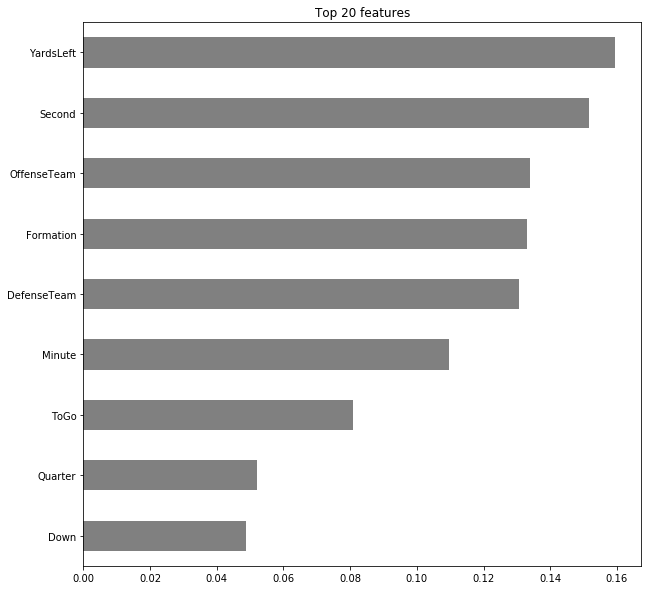

In [ ]:
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

gradient boosting Score R^2 Score 0.7220917168828516


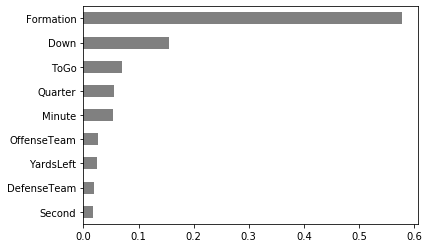

In [ ]:
boost = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(random_state=42, n_estimators=100, n_jobs=-1)
);

boost.fit(X_train, y_train);


# R2 score
boost_score = boost.score(X_val, y_val,)
print(f'gradient boosting Score R^2 Score {boost_score}');

# plotting the feature importances
model = boost.named_steps['xgbclassifier']
encoder = boost.named_steps['ordinalencoder']
columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, columns)
importances.sort_values().plot.barh(color='grey');

In [ ]:
from joblib import dump
dump(boost, 'xgb.joblib', compress = True)

['xgb.joblib']

In [ ]:
from google.colab import files
files.download('xgb.joblib')

In [ ]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# What if we tried all the features?
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

model = LogisticRegression(n_jobs=-1, random_state=42)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Validation Accuracy 0.7154529670105199


In [ ]:
from joblib import dump
dump(model, 'log.joblib', compress = True)

['log.joblib']

In [ ]:
from google.colab import files
files.download('log.joblib')

In [ ]:
import joblib
import sklearn
import category_encoders as ce
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')


joblib==0.14.0
scikit-learn==0.21.3
category_encoders==2.1.0


In [ ]:
def predict(Quarter, Minute, Second, OffenseTeam, DefenseTeam, Down, ToGo, YardsLeft, Formation):
    df = pd.DataFrame(
        columns=['Quarter', 'Minute', 'Second', 'OffenseTeam', 'DefenseTeam', 'Down', 'ToGo', 'YardsLeft', 'Formation'],
        data=[[Quarter, Minute, Second, OffenseTeam, DefenseTeam, Down, ToGo, YardsLeft, Formation]]
    )
    yp = pipeline.predict(df)[0]
    return yp

In [ ]:
predict(4, 7, 8, 'Chiefs', 'Chargers', 3, 1, 50, 'SHOTGUN')

'RUSH'

In [ ]:
df.head(100)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardsLeft,Description,Formation,PlayType
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,72,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,SHOTGUN,RUSH
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,48,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,UNDER CENTER,RUSH
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,75,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,SHOTGUN,PASS
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,62,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",NO HUDDLE SHOTGUN,PASS
42,2018091601,2018-09-16,1,11,32,BUF,LAC,3,7,83,(11:32) (SHOTGUN) 17-J.ALLEN SACKED AT BUF 14 ...,SHOTGUN,PASS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2018101407,2018-10-14,3,6,49,SEA,OAK,1,10,52,(6:49) 27-M.DAVIS LEFT END PUSHED OB AT SEA 47...,UNDER CENTER,RUSH
258,2018101407,2018-10-14,3,6,14,SEA,OAK,2,11,53,(6:14) (SHOTGUN) 3-R.WILSON PASS DEEP LEFT TO ...,SHOTGUN,PASS
259,2018101407,2018-10-14,3,5,30,SEA,OAK,1,10,11,"(5:30) (NO HUDDLE, SHOTGUN) 3-R.WILSON PASS SH...",NO HUDDLE SHOTGUN,PASS
260,2018101407,2018-10-14,3,5,21,OAK,SEA,1,10,83,(5:21) 24-M.LYNCH LEFT GUARD TO OAK 23 FOR 6 Y...,UNDER CENTER,RUSH


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

preprocessor = ce.OrdinalEncoder()
X_train_transformed = preprocessor.fit_transform(X_train[features])

model = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    n_jobs=-1)

model.fit(X_train_transformed, y_train)
permuter = PermutationImportance(model, scoring='roc_auc', n_iter=5, cv='prefit')
permuter.fit(X_train_transformed, y_train)
eli5.show_weights(permuter, top=None, feature_names=features)

Weight,Feature
0.2068 ± 0.0040,Formation
0.0408 ± 0.0025,Down


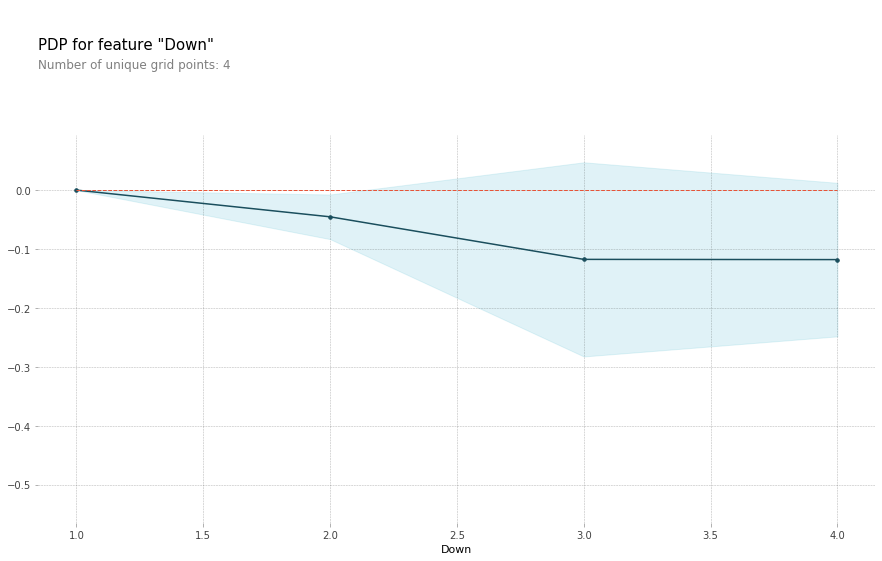

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature='Down'



pdp_isolated = pdp_isolate(model=model, dataset=X_train_transformed, 
                           model_features=X_train_transformed.columns, feature=feature)
pdp_plot(pdp_isolated, feature);

In [ ]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    return columns, index

plot_confusion_matrix(y_val, y_pred)

(['Predicted PASS', 'Predicted RUSH'], ['Actual PASS', 'Actual RUSH'])

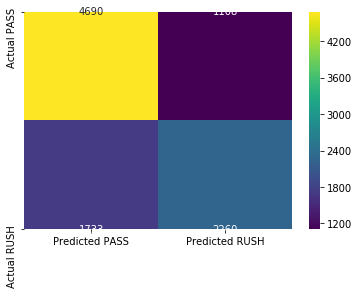

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);


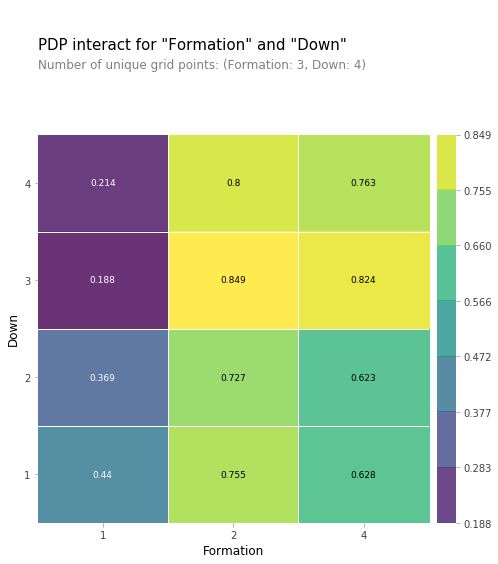

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Formation', 'Down']

interaction = pdp_interact(
    model=model, 
    dataset=X_train_transformed, 
    model_features=X_train_transformed.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);